In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
%matplotlib inline

### Chargement du dataset

In [78]:
path = 'C:/Users/guild/Downloads/Revision-Exam-Final/protein.csv'
df = pd.read_csv(path)

### Exploration / description des donnees

In [79]:
df.head(10)

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0
5,Denmark,10.6,10.8,3.7,25.0,9.9,21.9,4.8,0.7,2.4
6,E Germany,8.4,11.6,3.7,11.1,5.4,24.6,6.5,0.8,3.6
7,Finland,9.5,4.9,2.7,33.7,5.8,26.3,5.1,1.0,1.4
8,France,18.0,9.9,3.3,19.5,5.7,28.1,4.8,2.4,6.5
9,Greece,10.2,3.0,2.8,17.6,5.9,41.7,2.2,7.8,6.5


In [80]:
df.describe()

,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr&Veg
count,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000,25.000000
mean,9.828000,7.896000,2.936000,17.112000,4.284000,32.248000,4.276000,3.072000,4.136000
std,3.347078,3.694081,1.117617,7.105416,3.402533,10.974786,1.634085,1.985682,1.803903
min,4.400000,1.400000,0.500000,4.900000,0.200000,18.600000,0.600000,0.700000,1.400000
25%,7.800000,4.900000,2.700000,11.100000,2.100000,24.300000,3.100000,1.500000,2.900000
50%,9.500000,7.800000,2.900000,17.600000,3.400000,28.000000,4.700000,2.400000,3.800000
75%,10.600000,10.800000,3.700000,23.300000,5.800000,40.100000,5.700000,4.700000,4.900000
max,18.000000,14.000000,4.700000,33.700000,14.200000,56.700000,6.500000,7.800000,7.900000


In [96]:
# Les variables sont des pourcentages (proportions des sources de proteines), il
# faudrait standardiser les valeurs en divisant par 100 pour tout avoir entre 0 et 1 (sur la meme echelle).
df.iloc[:,1:] = df.iloc[:,1:] / 100

In [97]:
df.columns

Index(['Country', 'RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish', 'Cereals',
       'Starch', 'Nuts', 'Fr&Veg'],
      dtype='object')

In [98]:
# Semble y avoir un espace dans les noms de colonnes

In [99]:
df.columns = ['Country', 'RedMeat', 'WhiteMeat', 'Eggs', 'Milk', 'Fish',
       'Cereals', 'Starch', 'Nuts', 'Fr&Veg']

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 10 columns):
Country      25 non-null object
RedMeat      25 non-null float64
WhiteMeat    25 non-null float64
Eggs         25 non-null float64
Milk         25 non-null float64
Fish         25 non-null float64
Cereals      25 non-null float64
Starch       25 non-null float64
Nuts         25 non-null float64
Fr&Veg       25 non-null float64
dtypes: float64(9), object(1)
memory usage: 2.0+ KB


In [101]:
# ne contient pas de nulls

In [102]:
# Variance
df.var(axis=0)

#  RedMeat       11.202933
#  WhiteMeat     13.646233

# avec standardisation
# RedMeat      0.001120
# WhiteMeat    0.001365

RedMeat      0.001120
WhiteMeat    0.001365
Eggs         0.000125
Milk         0.005049
Fish         0.001158
Cereals      0.012045
Starch       0.000267
Nuts         0.000394
Fr&Veg       0.000325
dtype: float64

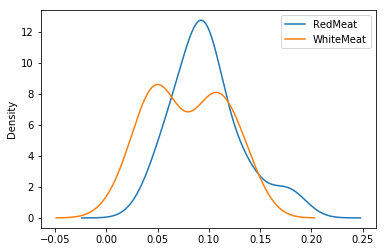

In [103]:
# Courbe de densite
df[['RedMeat', 'WhiteMeat']].plot.density()

          Eggs      Milk
Eggs  0.000125  0.000457
Milk  0.000457  0.005049


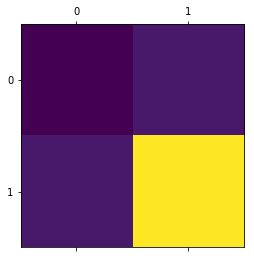

In [104]:
# Covariance entre milk et eggs
cova = df[['Eggs', 'Milk']].cov()
print(cova)

plt.matshow(cova)
plt.show()

          Eggs      Milk
Eggs  1.000000  0.575533
Milk  0.575533  1.000000


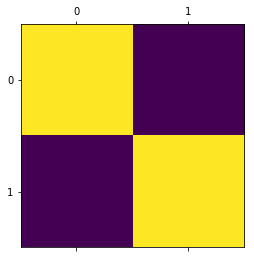

In [105]:
# Correlation entre milk et eggs
cor = df[['Eggs', 'Milk']].corr()
print(cor)

plt.matshow(cor)
plt.show()

            RedMeat  WhiteMeat
RedMeat    1.000000   0.153003
WhiteMeat  0.153003   1.000000


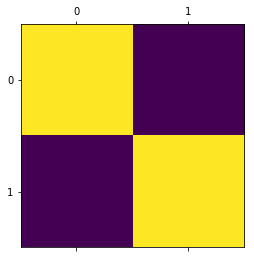

In [107]:
# Correlation entre red et white meat
cor = df[['RedMeat', 'WhiteMeat']].corr()
print(cor)

plt.matshow(cor)
plt.show()

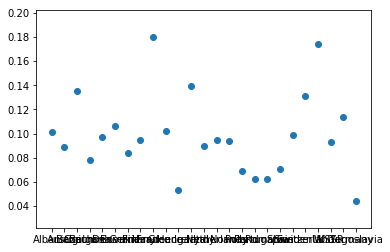

In [108]:
# Dispersion de la viande pour les pays
plt.scatter(df['Country'], df['RedMeat'])
plt.show()

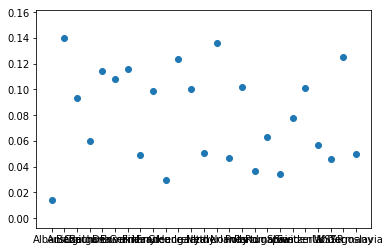

In [109]:
plt.scatter(df['Country'], df['WhiteMeat'])
plt.show()

In [110]:
df1 = df[['RedMeat', 'WhiteMeat']].copy(deep=True)
k = 2
km = KMeans(n_clusters=k, random_state=42)
km.fit(df1)
labels = km.labels_
df1["Cluster"] = labels

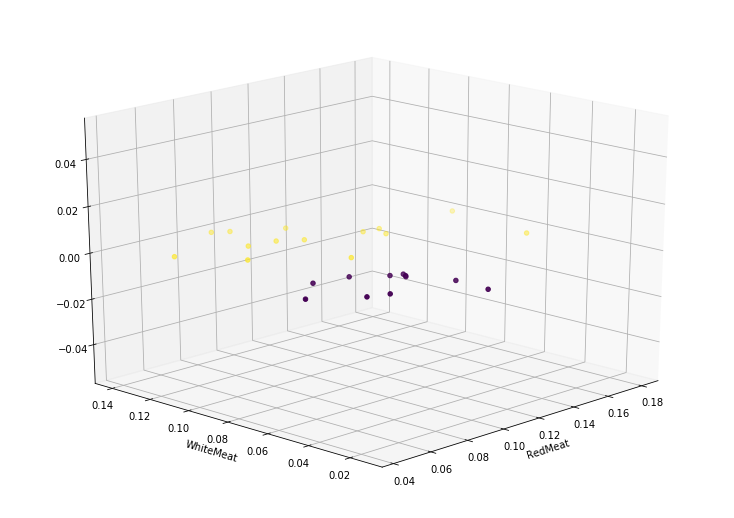

In [114]:
fig = plt.figure(figsize=(10, 7))
ax = Axes3D(fig, elev=21, azim=-136)
ax.scatter(
    df1['RedMeat'], df1['WhiteMeat'],
    c=labels.astype(np.float)
)
ax.set_xlabel('RedMeat')
ax.set_ylabel('WhiteMeat')
plt.show()